Model Accuracy: 83.33%


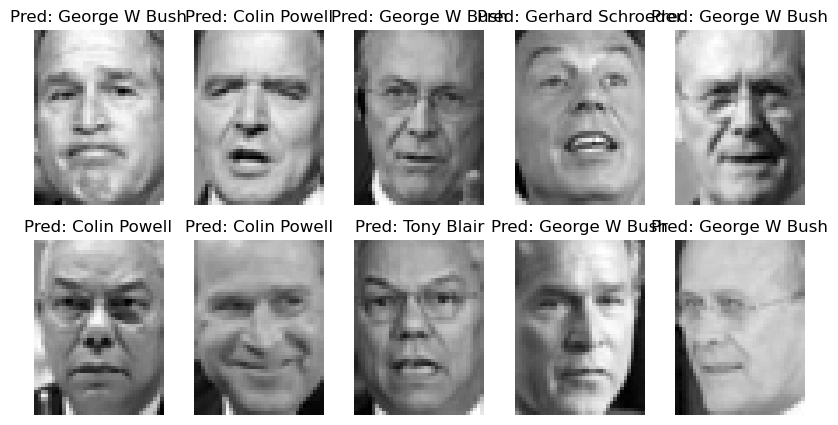

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score


lfw = fetch_lfw_people(min_faces_per_person=100, resize=0.4, download_if_missing=True)
X, y = lfw.images, lfw.target  # Images and labels

# Step 2: Flatten images and apply PCA
X_flat = X.reshape(X.shape[0], -1)  # Convert images to 1D array
pca = PCA(n_components=100).fit(X_flat)  # Reduce dimensions to 100 principal components
X_pca = pca.transform(X_flat)

# Step 3: Split dataset into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Step 4: Train SVM model
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = svm.predict(X_test)

# Step 6: Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Step 7: Visualize some test images with predictions
fig, axes = plt.subplots(2, 5, figsize=(10, 5))  # Create a grid of 2 rows, 5 columns
for i, ax in enumerate(axes.ravel()):
    ax.imshow(X[i], cmap='gray')  # Show actual face image
    ax.set_title(f"Pred: {lfw.target_names[y_pred[i]]}")  # Predicted name
    ax.axis('off')

plt.show()


In [14]:
!pip install opencv-python
